In [ ]:
!pip install GitPython
from git import Repo

# Clone the repository
repo = Repo.clone_from(
    'https://github.com/sahil-desai18/BME-450-Project.git',
    '/content/dataset.git'
)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


[1,    10] loss: 1.390
[1,    20] loss: 1.224
[1,    30] loss: 1.011
[1,    40] loss: 1.038
[1,    50] loss: 0.849
[1,    60] loss: 0.721
[1,    70] loss: 0.717
[1,    80] loss: 0.752
[1,    90] loss: 0.688
Accuracy for epoch 1: 59.86%
[2,    10] loss: 0.628
[2,    20] loss: 0.582
[2,    30] loss: 0.581
[2,    40] loss: 0.549
[2,    50] loss: 0.487
[2,    60] loss: 0.510
[2,    70] loss: 0.570
[2,    80] loss: 0.499
[2,    90] loss: 0.468
Accuracy for epoch 2: 77.46%
[3,    10] loss: 0.427
[3,    20] loss: 0.465
[3,    30] loss: 0.430
[3,    40] loss: 0.358
[3,    50] loss: 0.391
[3,    60] loss: 0.371
[3,    70] loss: 0.439
[3,    80] loss: 0.386
[3,    90] loss: 0.316
Accuracy for epoch 3: 83.83%
[4,    10] loss: 0.238
[4,    20] loss: 0.328
[4,    30] loss: 0.310
[4,    40] loss: 0.221
[4,    50] loss: 0.211
[4,    60] loss: 0.241
[4,    70] loss: 0.259
[4,    80] loss: 0.323
[4,    90] loss: 0.298
Accuracy for epoch 4: 90.24%
[5,    10] loss: 0.186
[5,    20] loss: 0.155
[5,    30]

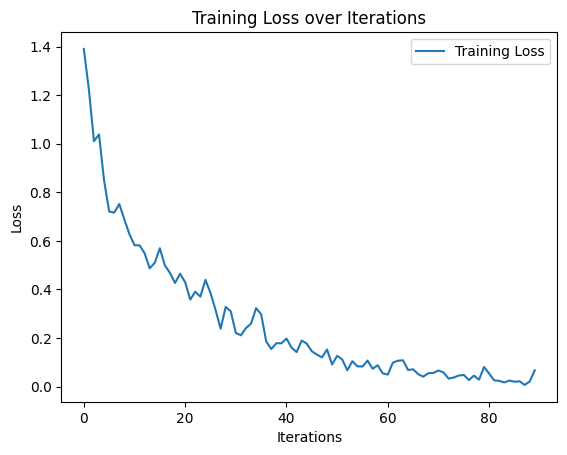

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms
from PIL import ImageEnhance

# Define transforms for data preprocessing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert images to grayscale
    transforms.Resize((128, 128)),  # Resize images to a fixed size
    transforms.Lambda(lambda img: ImageEnhance.Brightness(img).enhance(1)),  # Decrease brightness by a factor of 0.5
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalize pixel values to range [-1, 1]
])
# Define tumor type names
tumor_types = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Load the training and testing datasets
train_dataset = ImageFolder(root='dataset.git/Training', transform=transform)
test_dataset = ImageFolder(root='dataset.git/Testing', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # Batch size of 1 for one-by-one processing

# Define a simple convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 4)  # Change the output size to 4 for 4 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        features = x.clone()  # Save the intermediate features
        x = x.view(-1, 64 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x, features  # Return both the outputs and the intermediate features
# Initialize the network
net = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1E-3)

train_losses = []  # List to store training losses
test_losses = []



total_correct = 0
total_samples = 0

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Enable gradients for images
        inputs.requires_grad_(True)

        optimizer.zero_grad()
        outputs, _ = net(inputs)  # Unpack the outputs and ignore the intermediate features
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            train_losses.append(running_loss / 10)  # Append the average loss for this batch to the list
            running_loss = 0.0

    # Calculate accuracy at the end of each epoch
    epoch_accuracy = 100 * correct / total
    print(f'Accuracy for epoch {epoch+1}: {epoch_accuracy:.2f}%')

# Calculate overall training accuracy
overall_accuracy = 100 * total_correct / total_samples
print(f'Overall training accuracy: {overall_accuracy:.2f}%')

print('Finished Training')

# Plot the training & testing loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

Testing Accuracy: 72.84%


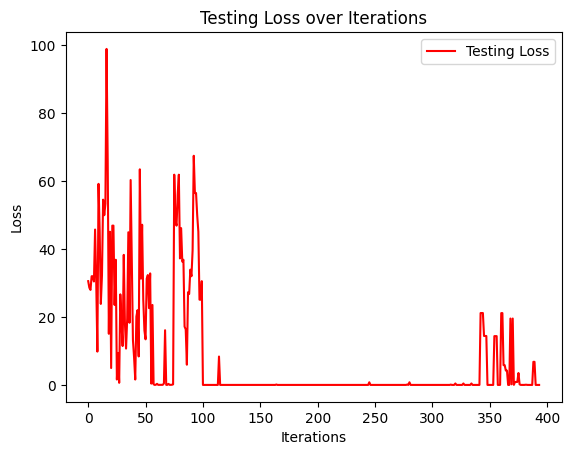

In [ ]:
test_losses = []  # List to store testing losses
total_correct_test = 0
total_samples_test = 0

# Switch to evaluation mode
net.eval()

# Loop over the testing dataset
with torch.no_grad():  # No need to calculate gradients for testing
    for inputs, labels in test_loader:
        outputs, _ = net(inputs)
        loss = criterion(outputs, labels)

        test_losses.append(loss.item())

        _, predicted = torch.max(outputs, 1)
        total_samples_test += labels.size(0)
        total_correct_test += (predicted == labels).sum().item()

# Calculate testing accuracy
testing_accuracy = 100 * total_correct_test / total_samples_test
print(f'Testing Accuracy: {testing_accuracy:.2f}%')

# Plot the testing loss
plt.plot(test_losses, label='Testing Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Testing Loss over Iterations')
plt.legend()
plt.show()

In [ ]:
# Define tumor type names
tumor_types = ['glioma', 'meningioma', 'no tumor', 'pituitary']
# Function to predict and visualize results for one image
def predict_and_visualize(image, label, epoch, loss):
    # Forward pass
    with torch.no_grad():
        output, features = net(image.unsqueeze(0))
        predicted_class_idx = torch.argmax(output, dim=1).item()
        predicted_class = tumor_types[predicted_class_idx]
        actual_class = tumor_types[label]

    # Convert image to numpy array
    image_np = image.permute(1, 2, 0).numpy()

    # Visualize the image
    plt.imshow(image_np, cmap='gray')
    plt.title(f'Epoch: {epoch}, Loss: {loss:.4f}\nPredicted: {predicted_class}, Actual: {actual_class}')
    plt.axis('off')
    plt.show()

    # Plot where the network thinks the tumor is
    plt.imshow(image_np, cmap='gray')
    plt.imshow(features[0, 0].numpy(), cmap='hot', alpha=0.5)  # Overlay heatmap
    plt.title('Tumor Prediction')
    plt.axis('off')
    plt.show()

# Evaluation mode
net.eval()

# Lists to store predictions and actual labels
all_predictions = []
all_labels = []
accuracies = []

# Initialize lists to store accuracies and losses
accuracies = []
all_losses = []

# Loop through each epoch
for epoch in range(10):  # Assuming you trained for 10 epochs
    # Initialize variables for each epoch
    epoch_predictions = []
    epoch_labels = []
    epoch_losses = []

    # Loop through the test dataset
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data

        # Forward pass
        output, features = net(inputs)
        loss = criterion(output, labels)

        # Get predictions
        _, predicted = torch.max(output, 1)
        prediction = predicted.item()
        actual = labels.item()

        # Append predictions, actual labels, and loss to the lists for this epoch
        epoch_predictions.append(prediction)
        epoch_labels.append(actual)
        epoch_losses.append(loss.item())

        # Display the image for every 10th image
        if i % 10 == 0:
            image, _ = test_dataset[i]
            predict_and_visualize(image, actual, epoch, loss.item())

    # Append the predictions, labels, and losses for this epoch to the main lists
    all_predictions.append(epoch_predictions)
    all_labels.append(epoch_labels)
    all_losses.append(epoch_losses)

    # Calculate accuracy for this epoch
    accuracy = (np.array(epoch_predictions) == np.array(epoch_labels)).mean()
    accuracies.append(accuracy)
    print(f"Accuracy for epoch {epoch+1}: {accuracy}")

# Calculate overall accuracy
overall_accuracy = np.mean(accuracies)
print(f"Overall accuracy: {overall_accuracy}")

# Plot the losses and accuracy on the same graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot losses
color = 'tab:red'
ax1.set_xlabel('Batch')
ax1.set_ylabel('Loss', color=color)
for i, losses in enumerate(all_losses):
    ax1.plot(losses, label=f'Epoch {i+1}', color=color, alpha=0.3)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accuracies, label='Accuracy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Title and display
plt.title('Loss and Accuracy over Batches for Each Epoch')
plt.show()

NameError: name 'net' is not defined